In [25]:
### Data Analisy Libraries ###
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import inflection
import sweetviz as sv


##ml
from sklearn.preprocessing import LabelEncoder

#auxiliar packages
from IPython.display         import Image
from IPython.core.display    import HTML
from scipy                   import stats
import inflection
import pickle
import warnings
import json
import os
warnings.filterwarnings('ignore')


In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    accent = lambda x: inflection.transliterate(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_old = list(map(accent, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [8]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [34]:
data_train_raw = pd.read_csv('..\\base\\train.csv')

In [46]:
cat_attributes = data_train_raw.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [47]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

Gender              2
Customer Type       2
Type of Purchase    2
Store size          3
Satisfaction        2
dtype: int64

In [49]:
df1 = rename_columns(data)

In [55]:
df1.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,Satisfied


# AGE

In [58]:
df_age_inferior_18 = df1.loc[df1['age'] < 18].head()
df_age_superior_18 = df1.loc[df1['age'] >= 18].head()

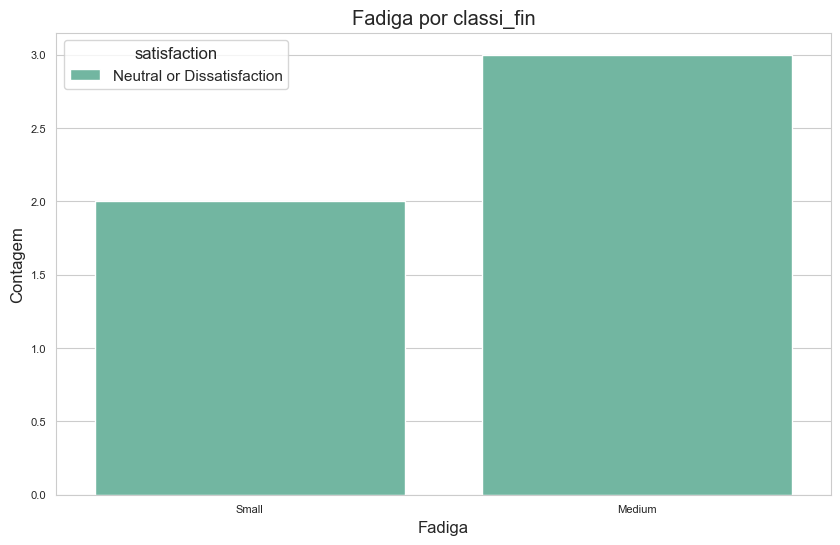

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='store_size', hue='satisfaction', data=df_age_inferior_18, palette="Set2")

plt.title("Fadiga por classi_fin")
plt.xlabel("Fadiga")
plt.ylabel("Contagem")


plt.show()

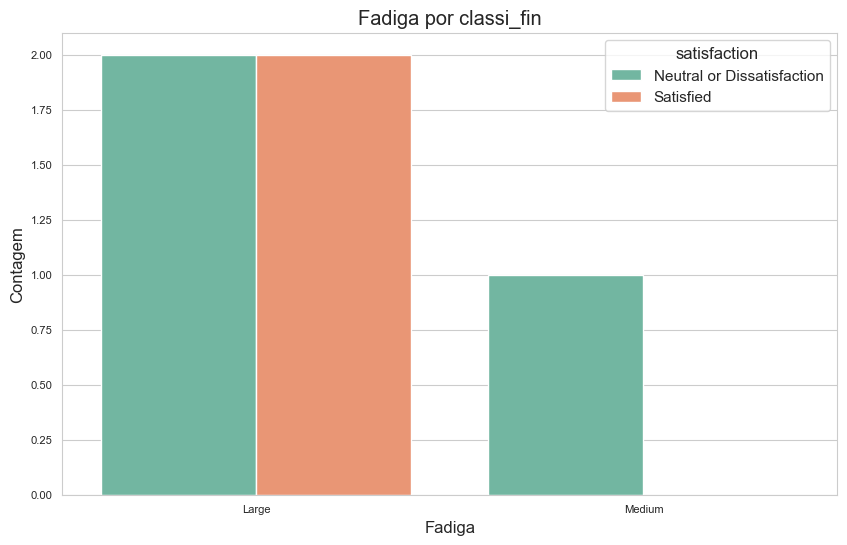

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='store_size', hue='satisfaction', data=df_age_superior_18, palette="Set2")

plt.title("Fadiga por classi_fin")
plt.xlabel("Fadiga")
plt.ylabel("Contagem")


plt.show()

# store_size

In [62]:
df_Small = df1.loc[df1['store_size'] == 'Small']
df_Large = df1.loc[df1['store_size'] == 'Large']
df_Medium = df1.loc[df1['store_size'] == 'Medium']


In [66]:
df_Small['satisfaction'].value_counts(normalize=True)

Neutral or Dissatisfaction   0.75
Satisfied                    0.25
Name: satisfaction, dtype: float64

In [67]:
df_Large['satisfaction'].value_counts(normalize=True)

Satisfied                    0.69
Neutral or Dissatisfaction   0.31
Name: satisfaction, dtype: float64

In [68]:
df_Medium['satisfaction'].value_counts(normalize=True)

Neutral or Dissatisfaction   0.81
Satisfied                    0.19
Name: satisfaction, dtype: float64

In [39]:
le = LabelEncoder()
df1['gender'] = le.fit_transform( df1['gender'] )
df1['customer_type'] = le.fit_transform( df1['customer_type'] )
df1['type_of_purchase'] = le.fit_transform( df1['type_of_purchase'] )
df1['store_size'] = le.fit_transform( df1['store_size'] )
df1['satisfaction'] = le.fit_transform( df1['satisfaction'] )

In [43]:
# # Analyse Dataset
report = sv.analyze(source = df1, target_feat = 'satisfaction')

#report.show_notebook(w="100%", h="full")
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
translations = {'id': 'Identificação',
                'Gender': 'Gênero',
                'Customer Type': 'Tipo de Cliente',
                'Age': 'Idade',
                'Type of Purchase': 'Tipo de Compra',
                'Store size': 'Tamanho da Loja',
                'Store distance': 'Distância da Loja',
                'InStore wifi': 'Wi-Fi na Loja',
                'Open/Close time convenient': 'Horário de Abertura/Fechamento Conveniente',
                'Easy of online shopping': 'Facilidade de Compras Online',
                'Store location': 'Localização da Loja',
                'Toilet cleaning': 'Limpeza do Banheiro',
                'Dressing room': 'Sala de Prova',
                'Waiting room': 'Sala de Espera',
                'Kids entertainment': 'Entretenimento para Crianças',
                'Seller service': 'Atendimento do Vendedor', 'Showroom': 'Mostruário',
                'Self-Store': 'Autoatendimento', 
                'Purchase service': 'Serviço de Compra',
                'Store Service': 'Serviço da Loja',
                'Cleanliness': 'Limpeza',
                'Carrier delay in minutes': 'Atraso do Transportador em Minutos',
                'Delivery delay in minutes': 'Atraso na Entrega em Minutos',
                'Satisfaction': 'Satisfação'}

In [44]:
df1.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,0
1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,0
2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,1
3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,0
4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,1


In [41]:
df2 = df1.copy()

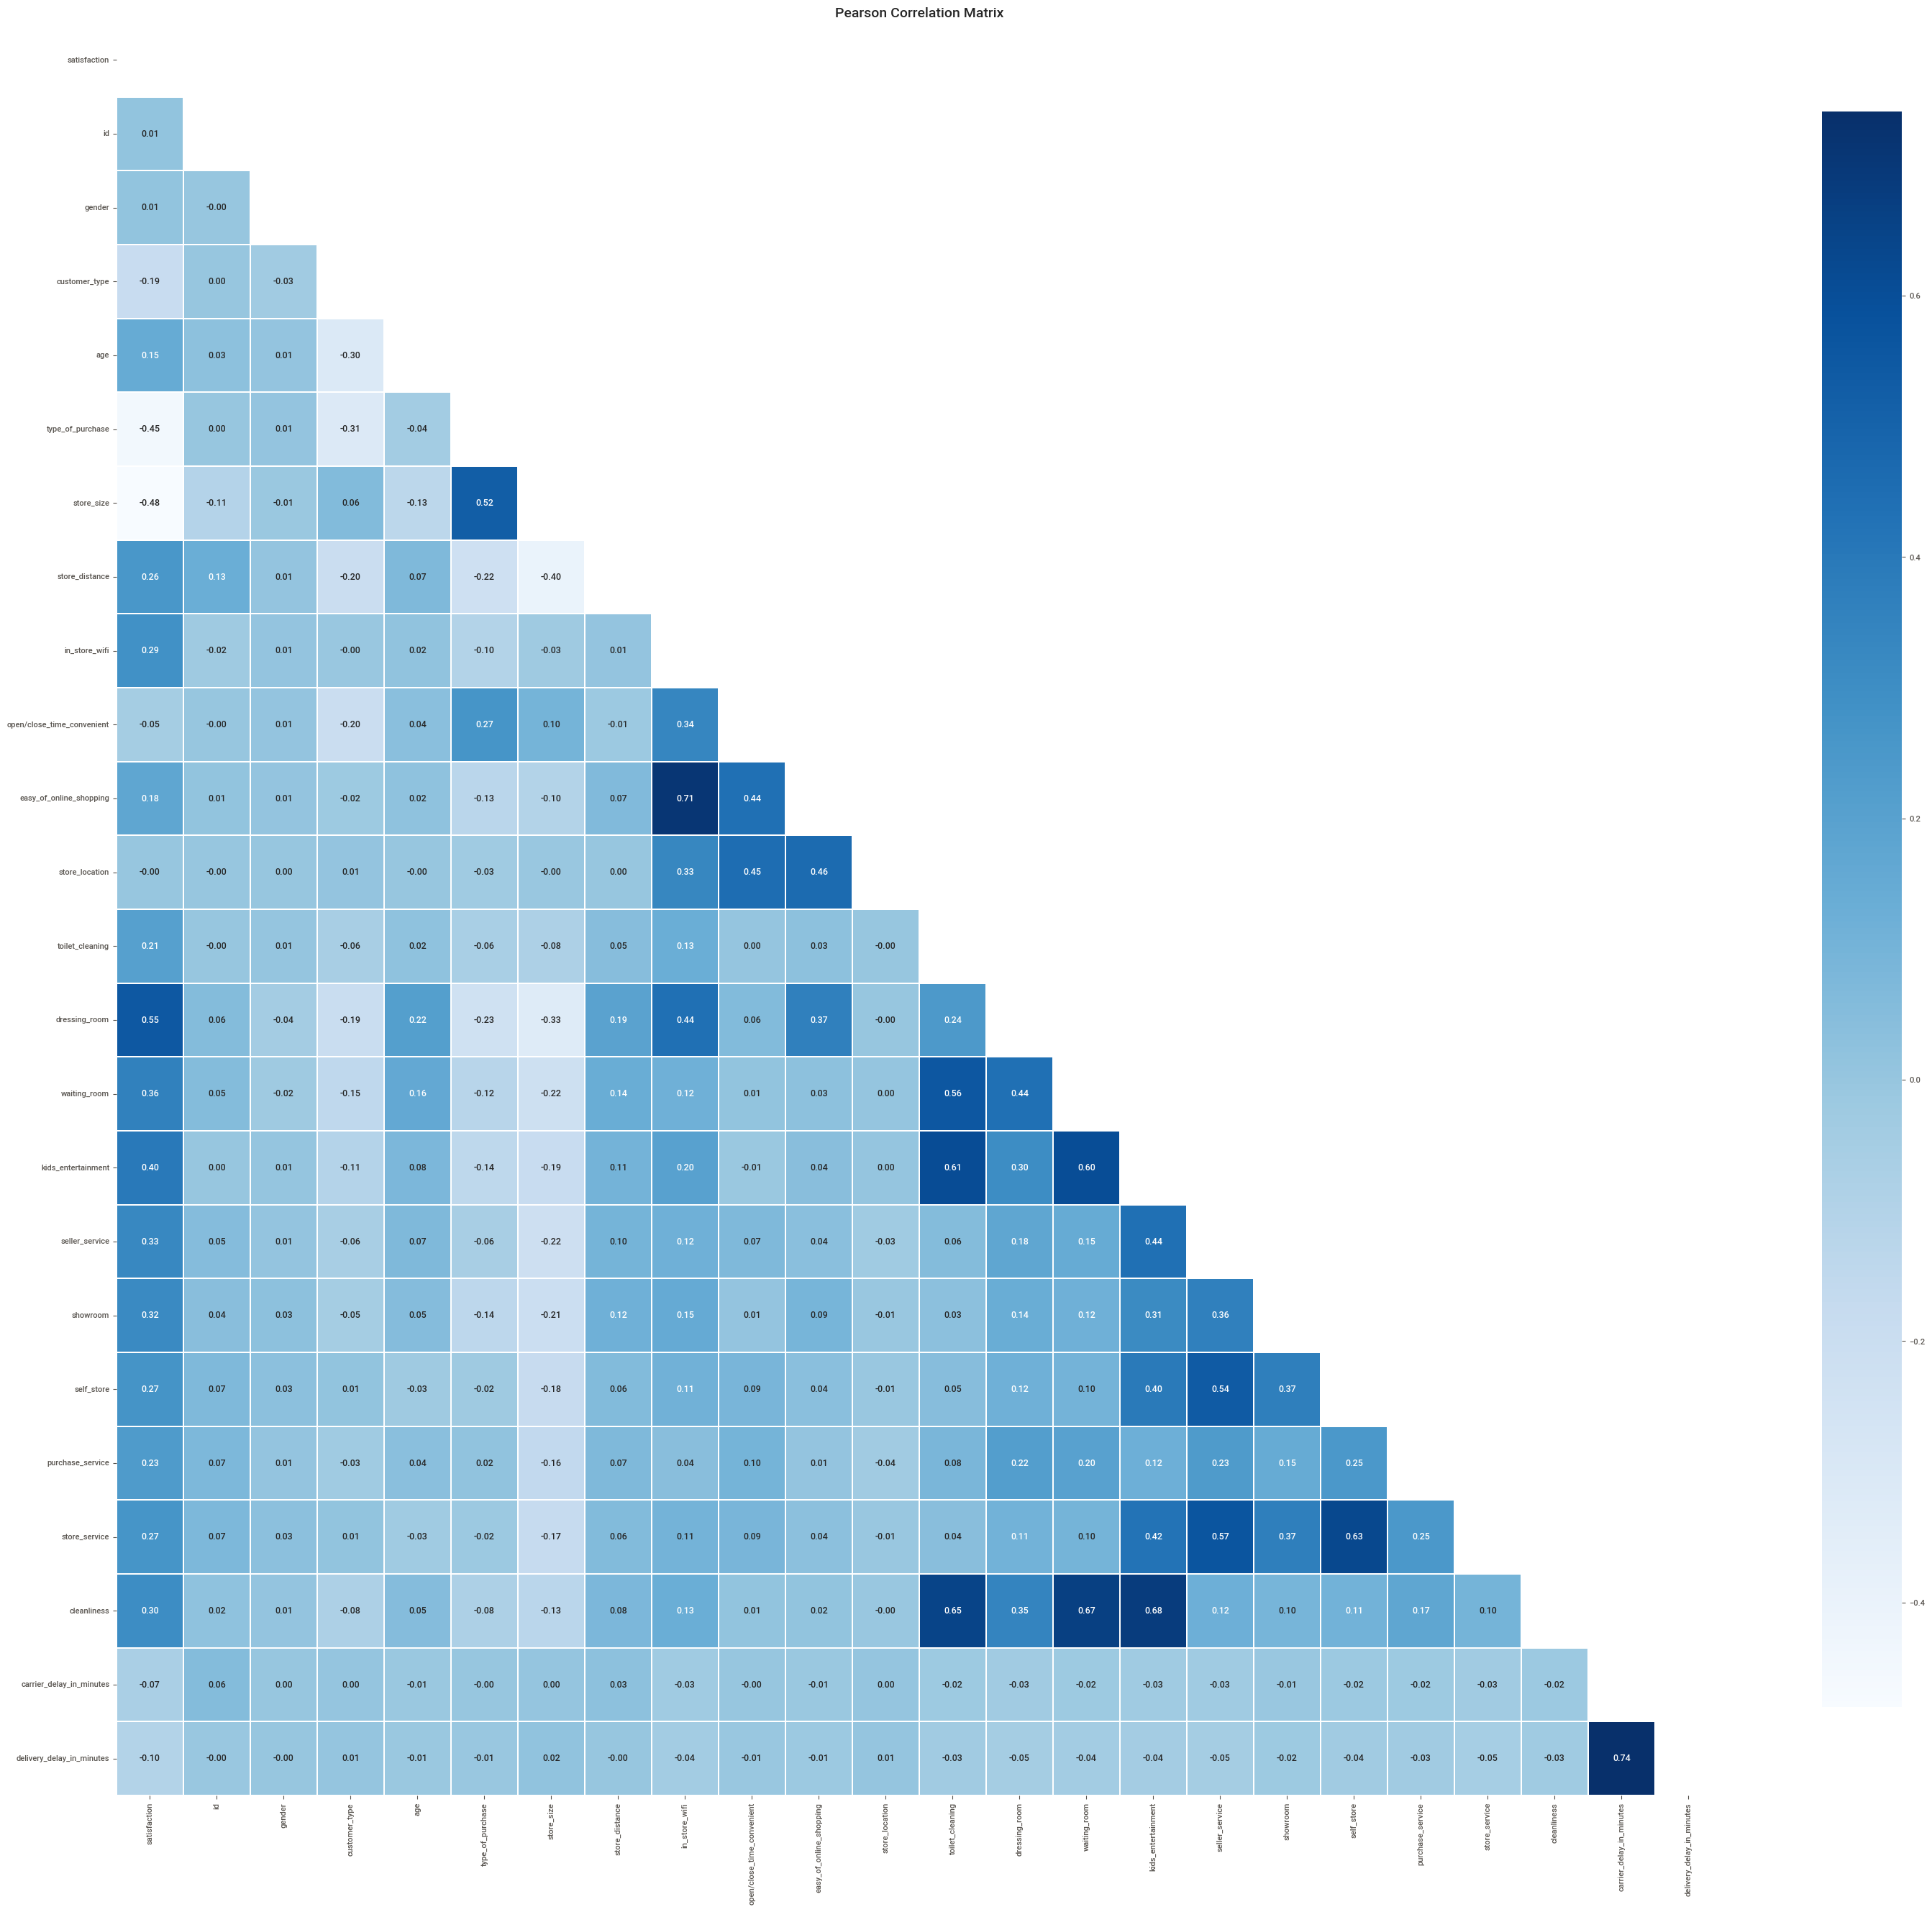

In [42]:
import shap 
aux = pd.concat([df2['satisfaction'],df2.drop(['satisfaction'], axis=1)], axis=1)
# aux = df5.copy()
mask = np.zeros_like(aux.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(36, 32))

plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')

sns.heatmap(aux.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});